# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

(0.0, 1.0)

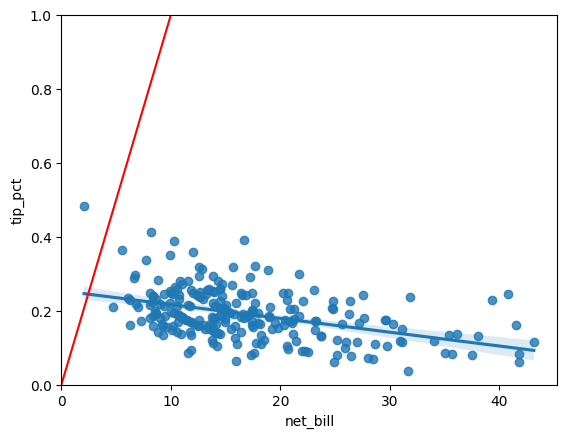

In [10]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0, top= 1)

(0.0, 10.5)

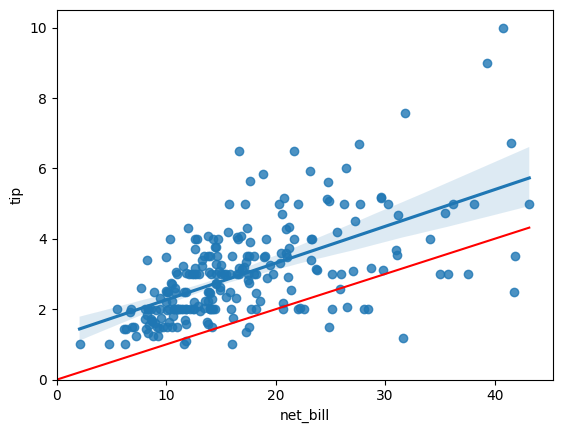

In [12]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No geral, quanto maior a conta, maior o percentual da gorjeta. No entanto, existem muitos casos onde pessoas dão uma gorjeta menor em relação ao total da conta.
Isso é explicado pelo gráfico 2, onde podemos ver que o valor absoluto das gorjetas cresce numa proporção igual e constante, que é de aproximadamente 10%¨.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [5]:
reg1 = smf.ols('tip ~ net_bill', data = tips).fit()
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()

In [15]:
reg1f = reg1.fittedvalues
reg1f.mean()

2.99827868852459

In [16]:
reg2f = reg2.fittedvalues
reg2f.mean()

0.20212349241525437

In [18]:
reg1.rsquared

0.3325407312323706

In [19]:
reg2.rsquared

0.09129084920662944

Nenhum dos dois R2 estão próximos de 1, porém o que demonstra o valor absoluto de gorjetas é maior (0.333)